Author: Pınar Süngü

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
from sklearn.metrics import mean_squared_error

In [2]:
#Read Data

df = pd.read_excel('Problem2.xlsx')
df.index = df.index +1 
print(df.head())

   Month     sales  ch1_spend  ch2_spend
1      1  128737.0    1794323     925311
2      2  159867.0    2119022    1052114
3      3  190928.0    2240635    1416348
4      4  175295.0    2043855    1247922
5      5  201215.0    2330420    1513393


In [3]:
df_explanatory= df[['ch1_spend', 'ch2_spend']].astype(float)

Text(0.5, 1.0, 'Spendings')

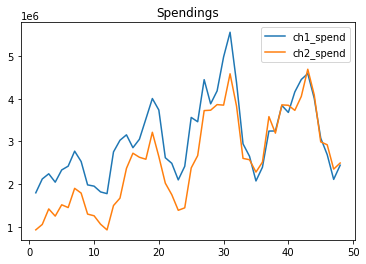

In [4]:
df_explanatory.plot.line()
plt.title("Spendings")

Text(0.5, 1.0, 'Sales')

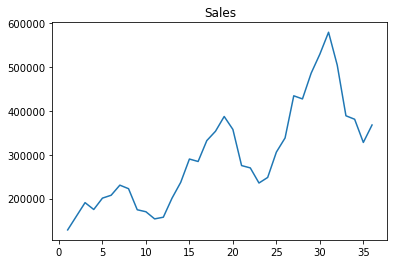

In [5]:
df['sales'].plot.line()
plt.title("Sales")

In [6]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

In [7]:
prep_data = df[['sales', 'ch1_spend', 'ch2_spend']][:-12]

In [8]:
def adf_test(series,title=''):

    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') 
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    for key,val in result[4].items():
        out[f'critical value ({key})']=val
    print(out.to_string()) 
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [9]:
adf_test(prep_data['ch1_spend'])

Augmented Dickey-Fuller Test: 
ADF test statistic      -0.566461
p-value                  0.878382
# lags used             10.000000
# observations          25.000000
critical value (1%)     -3.723863
critical value (5%)     -2.986489
critical value (10%)    -2.632800
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [10]:
adf_test(prep_data['ch2_spend'])

Augmented Dickey-Fuller Test: 
ADF test statistic       0.647084
p-value                  0.988720
# lags used             10.000000
# observations          25.000000
critical value (1%)     -3.723863
critical value (5%)     -2.986489
critical value (10%)    -2.632800
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [11]:
adf_test(prep_data['sales'])

Augmented Dickey-Fuller Test: 
ADF test statistic       1.537160
p-value                  0.997656
# lags used             10.000000
# observations          25.000000
critical value (1%)     -3.723863
critical value (5%)     -2.986489
critical value (10%)    -2.632800
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


Initial series are non-stationary, we need to make them stationary to work on

In [12]:
df_difference = prep_data.diff()

In [13]:
adf_test(df_difference['sales'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -6.193923e+00
p-value                 6.029337e-08
# lags used             1.000000e+01
# observations          2.400000e+01
critical value (1%)    -3.737709e+00
critical value (5%)    -2.992216e+00
critical value (10%)   -2.635747e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [14]:
adf_test(df_difference['ch1_spend'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -9.353563e+00
p-value                 8.172578e-16
# lags used             1.000000e+01
# observations          2.400000e+01
critical value (1%)    -3.737709e+00
critical value (5%)    -2.992216e+00
critical value (10%)   -2.635747e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [15]:
adf_test(df_difference['ch2_spend'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -6.651986e+00
p-value                 5.093653e-09
# lags used             1.000000e+01
# observations          2.400000e+01
critical value (1%)    -3.737709e+00
critical value (5%)    -2.992216e+00
critical value (10%)   -2.635747e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [16]:
train_sample = pd.concat([df["sales"].diff().iloc[1:],df["ch1_spend"].diff().iloc[1:],df["ch2_spend"].diff().iloc[1:]],axis=1)
model = sm.tsa.VARMAX(train_sample,order=(2,1),trend='ct')
result = model.fit(maxiter=200,disp=False)
print(result.summary())
predicted_result = result.predict(start=35, end=46)

C:\Users\pinarsungu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


                                    Statespace Model Results                                   
Dep. Variable:     ['sales', 'ch1_spend', 'ch2_spend']   No. Observations:                   47
Model:                                      VARMA(2,1)   Log Likelihood               -1718.788
                                           + intercept   AIC                           3515.577
Date:                                 Wed, 13 Oct 2021   BIC                           3587.733
Time:                                         09:47:01   HQIC                          3542.730
Sample:                                              0                                         
                                                  - 47                                         
Covariance Type:                                   opg                                         
Ljung-Box (L1) (Q):        nan, 0.89, 0.10   Jarque-Bera (JB):     0.52, 0.59, 0.20
Prob(Q):                   nan, 0.34, 0.75   Prob(JB

C:\Users\pinarsungu\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\pinarsungu\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


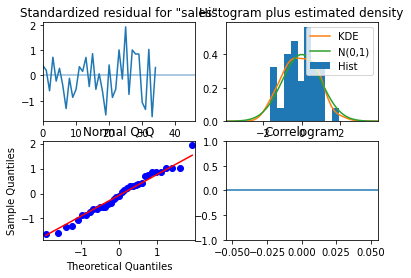

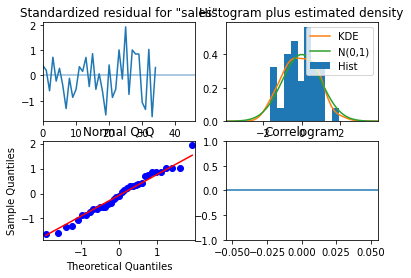

In [17]:
result.plot_diagnostics()

Residual plots show the model is acceptable

In [18]:
# calculating error ch1_spend
rmse = math.sqrt(mean_squared_error(train_sample.iloc[35:50]['ch1_spend'], predicted_result['ch1_spend']))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 357446.91644869413.


In [19]:
# calculating error ch2_spend
rmse = math.sqrt(mean_squared_error(train_sample.iloc[35:50]['ch2_spend'], predicted_result['ch2_spend']))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 420522.7956261475.


<AxesSubplot:>

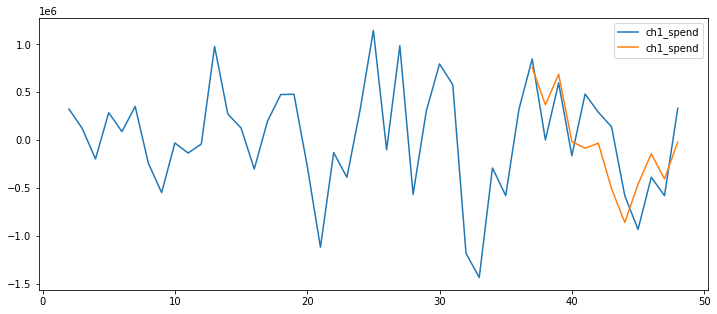

In [20]:
#Lag 1 forecast for ch1_spend 

train_sample['ch1_spend'].plot(figsize=(12,5),legend=True)
predicted_result['ch1_spend'].plot(legend=True)

<AxesSubplot:>

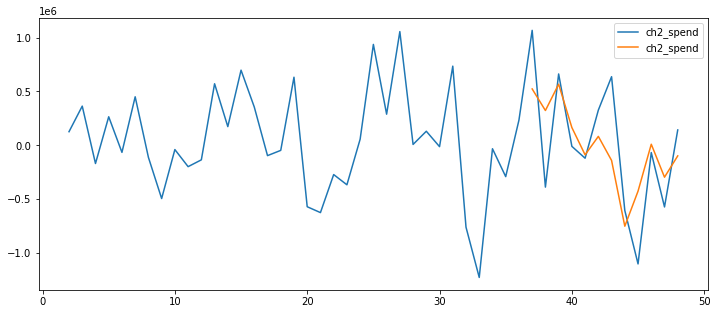

In [21]:
#Lag 1 forecast for ch2_spend 

train_sample['ch2_spend'].plot(figsize=(12,5),legend=True)
predicted_result['ch2_spend'].plot(legend=True)

<AxesSubplot:>

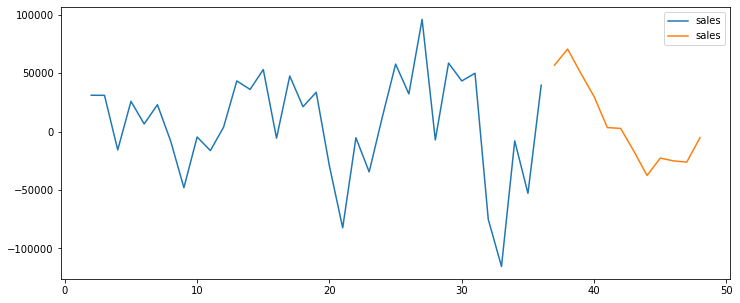

In [22]:
#Lag 1 forecast for sales 

train_sample['sales'].plot(figsize=(12,5),legend=True)
predicted_result['sales'].plot(legend=True)

In [23]:
df['Forecast_Sales'] = None

In [24]:
df['Forecast_Sales'][36] = df['sales'][36]
df['Forecast_Sales'][37] = df['sales'][36] + predicted_result['sales'][37]
df['Forecast_Sales'][38] = df['Forecast_Sales'][37] + predicted_result['sales'][38]
df['Forecast_Sales'][39] = df['Forecast_Sales'][38] + predicted_result['sales'][39]
df['Forecast_Sales'][40] = df['Forecast_Sales'][39] + predicted_result['sales'][40]
df['Forecast_Sales'][41] = df['Forecast_Sales'][40] + predicted_result['sales'][41]
df['Forecast_Sales'][42] = df['Forecast_Sales'][41] + predicted_result['sales'][42]
df['Forecast_Sales'][43] = df['Forecast_Sales'][42] + predicted_result['sales'][43]
df['Forecast_Sales'][44] = df['Forecast_Sales'][43] + predicted_result['sales'][44]
df['Forecast_Sales'][45] = df['Forecast_Sales'][44] + predicted_result['sales'][45]
df['Forecast_Sales'][46] = df['Forecast_Sales'][45] + predicted_result['sales'][46]
df['Forecast_Sales'][47] = df['Forecast_Sales'][46] + predicted_result['sales'][47]
df['Forecast_Sales'][48] = df['Forecast_Sales'][47] + predicted_result['sales'][48]

<ipython-input-24-9a5b733b1ace>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forecast_Sales'][36] = df['sales'][36]
<ipython-input-24-9a5b733b1ace>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forecast_Sales'][37] = df['sales'][36] + predicted_result['sales'][37]
<ipython-input-24-9a5b733b1ace>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forecast_Sales'][38] = df['Forecast_Sales'][37] + predicted_result['sales'

<AxesSubplot:>

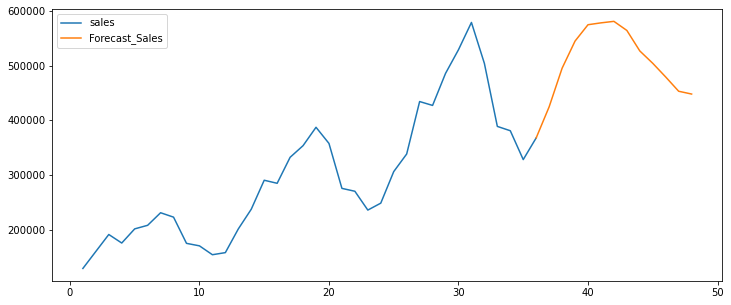

In [25]:
df['sales'].plot(figsize=(12,5),legend=True)
df['Forecast_Sales'].plot(legend=True)

Numeric results:

In [26]:
df[['Month', 'ch1_spend', 'ch2_spend', 'Forecast_Sales']][36:]

,Month,ch1_spend,ch2_spend,Forecast_Sales
37,37,3242688,3581857,424791.792442
38,38,3245078,3194438,495448.042664
39,39,3842958,3857122,545217.17693
40,40,3679834,3847946,575171.996586
41,41,4161251,3728782,578587.678349
42,42,4452800,4055848,581349.687445
43,43,4591274,4693084,564705.313355
44,44,4009656,4088780,527148.613279
45,45,3077247,2988618,504487.396853
46,46,2689264,2921886,479420.369709
